# Data Stream Construction

In order to evaluate an adaptive learning system, it is valuable to use constructed data streams with _known_ concept drift dynamics.
FALL provides tools to construct such data streams, in order to test and evaluate adaptive learning systems.

## Data Generators

The first step to constructing a data stream is the sources of observations for each concept.

A data stream can be thought of as a series of contiguous segments, where within each segment observations are drawn from a stationary joint distribution, the _concept_. A data generator defines the joint distribution for a concept, and enables us to draw new observations from it.

FALL follows the data generator interface defined in River, enabling the range of data generators implemented in the River package to be used seamlessly.

In [5]:
# We can directly use synthetic data generators implemented in river.datasets.synth
# or real datasets.
from river.datasets.synth.random_tree import RandomTree

random_tree_generator = RandomTree()

# A data generator enables us to draw X,y samples from a joint distribution defining a concept.
for X,y in random_tree_generator.take(5):
    print(X, y)


{'x_num_0': 0.3221947544157113, 'x_num_1': 0.8810256578410547, 'x_num_2': 0.2173088590026232, 'x_num_3': 0.8580441834405595, 'x_num_4': 0.5496230196435642, 'x_cat_0': 1, 'x_cat_1': 2, 'x_cat_2': 3, 'x_cat_3': 2, 'x_cat_4': 3} 1
{'x_num_0': 0.6710248001103009, 'x_num_1': 0.913426188021683, 'x_num_2': 0.5259157523011264, 'x_num_3': 0.7749416995512516, 'x_num_4': 0.18596901631087004, 'x_cat_0': 3, 'x_cat_1': 0, 'x_cat_2': 1, 'x_cat_3': 0, 'x_cat_4': 0} 0
{'x_num_0': 0.6331467544813348, 'x_num_1': 0.08881290511809281, 'x_num_2': 0.3067196949122002, 'x_num_3': 0.31513188364095435, 'x_num_4': 0.7235968802625679, 'x_cat_0': 1, 'x_cat_1': 4, 'x_cat_2': 4, 'x_cat_3': 4, 'x_cat_4': 2} 0
{'x_num_0': 0.5483000321680498, 'x_num_1': 0.7170022510790028, 'x_num_2': 0.9620047505766117, 'x_num_3': 0.2476439281713917, 'x_num_4': 0.5743848475087185, 'x_cat_0': 3, 'x_cat_1': 4, 'x_cat_2': 2, 'x_cat_3': 0, 'x_cat_4': 1} 0
{'x_num_0': 0.1993612171460396, 'x_num_1': 0.2672295547476189, 'x_num_2': 0.1623300694

In [6]:
# In the case of the RandomTree generator, different seed values generate different
# decision trees for labelling data, defining different decicion boundaries p(y|X)
# and thus different concepts. p(X) is stationary.
random_tree_generator2 = RandomTree(seed_tree=5)

for X,y in random_tree_generator2.take(5):
    print(X, y)

{'x_num_0': 0.5546636543340981, 'x_num_1': 0.3800797973997724, 'x_num_2': 0.9319140090048997, 'x_num_3': 0.9282375950821504, 'x_num_4': 0.5477179083780958, 'x_cat_0': 3, 'x_cat_1': 2, 'x_cat_2': 2, 'x_cat_3': 4, 'x_cat_4': 2} 1
{'x_num_0': 0.9940675289691494, 'x_num_1': 0.7648156150403381, 'x_num_2': 0.8676529808569255, 'x_num_3': 0.8603657315597211, 'x_num_4': 0.10995135940519041, 'x_cat_0': 4, 'x_cat_1': 4, 'x_cat_2': 4, 'x_cat_3': 0, 'x_cat_4': 1} 1
{'x_num_0': 0.8334506673647456, 'x_num_1': 0.8552620442402288, 'x_num_2': 0.985490458356309, 'x_num_3': 0.36278141170034717, 'x_num_4': 0.45709718056717363, 'x_cat_0': 0, 'x_cat_1': 2, 'x_cat_2': 2, 'x_cat_3': 3, 'x_cat_4': 0} 1
{'x_num_0': 0.9044265462006161, 'x_num_1': 0.41816873266156973, 'x_num_2': 0.560001996968209, 'x_num_3': 0.554322863251322, 'x_num_4': 0.9306937046865573, 'x_cat_0': 4, 'x_cat_1': 2, 'x_cat_2': 1, 'x_cat_3': 2, 'x_cat_4': 3} 0
{'x_num_0': 0.805651999319772, 'x_num_1': 0.12621922808306607, 'x_num_2': 0.51705346076

### FALL data generators

In order to accurately evaluate adaptive learning systems, it is important that the data we use for evaluation replicates the distributions we expect to see in the real world.

FALL implements a number of data generators which accurately mimic distribution patterns seen in real-world datasets.
For example, while many existing synthetic data generators implement change in p(y|X) between concepts, in real-world data we often see corresponding change in p(X). This is important, as it enables unsupervised methods to work. FALL implements synthetic data generators which generate concepts which change in both p(y|X) and p(X), in order to accurately test and evaluate any adaptive learning system.

In [7]:
# Data generators can be found in the data.synthetic module.
from streamselect.data.synthetic.wind_sim import WindSimGenerator

# The interface is the same as the generators implemented in River, enabling seamless integration.
stream = WindSimGenerator()

for x, y in stream.take(5):
    print(x, y)

{'x_num_0': 2295.0, 'x_num_1': 2295.0, 'x_num_2': 2295.0, 'x_num_3': 2295.0, 'x_num_4': 2295.0, 'x_num_5': 2295.0, 'x_num_6': 2295.0, 'x_num_7': 2295.0, 'x_num_8': 2295.0, 'x_num_9': 2295.0, 'x_num_10': 2295.0, 'x_num_11': 1605.2461770255704, 'x_num_12': 2295.0, 'x_num_13': 1469.0111952983953, 'x_num_14': 1769.7072503702177, 'x_num_15': 1808.1334764072435} 14
{'x_num_0': 2295.0, 'x_num_1': 2295.0, 'x_num_2': 2295.0, 'x_num_3': 2295.0, 'x_num_4': 2295.0, 'x_num_5': 2295.0, 'x_num_6': 2295.0, 'x_num_7': 2295.0, 'x_num_8': 2295.0, 'x_num_9': 2295.0, 'x_num_10': 2295.0, 'x_num_11': 1605.2461770255704, 'x_num_12': 2295.0, 'x_num_13': 1469.0111952983953, 'x_num_14': 1769.7072503702177, 'x_num_15': 1808.1334764072435} 0
{'x_num_0': 456.60511679800425, 'x_num_1': 281.90403808965704, 'x_num_2': 1048.8729212948942, 'x_num_3': 273.0589731314732, 'x_num_4': 259.98399684392757, 'x_num_5': 516.571701679001, 'x_num_6': 820.2973826816338, 'x_num_7': 176.53195817299525, 'x_num_8': 0.0, 'x_num_9': 498.6

The <WindSimGenerator> simulates a real-world air pollution inference task.
The goal is to infer the air quality levels at a central sensor, based on the current and previous readings taken from surrounding sensors.

Concepts here are determined by different locations and characteristics of pollution emitters which determine how pollution is created in the environment, as well as the wind characteristics which determine how pollution is transmitted over time.

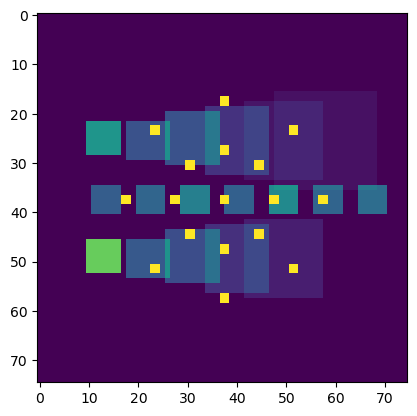

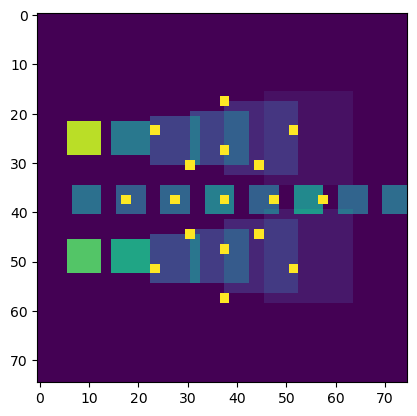

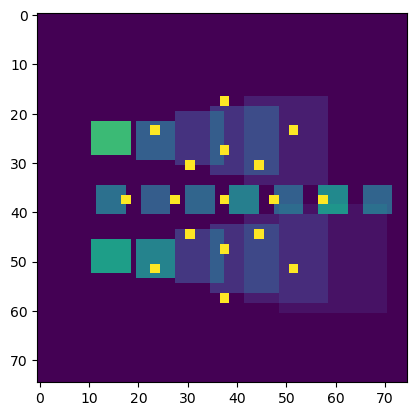

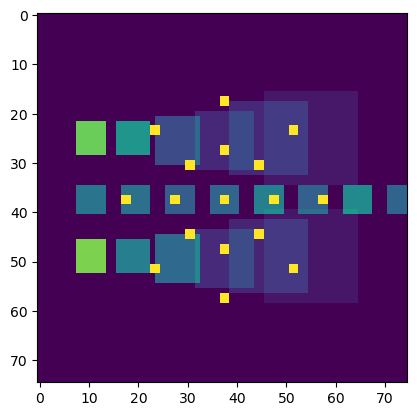

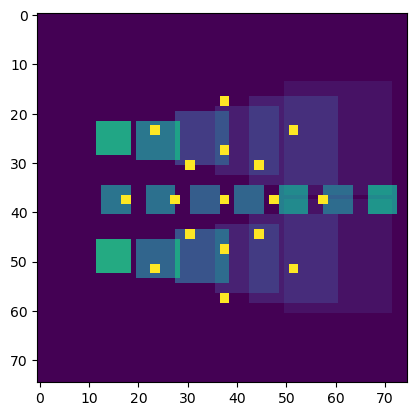

In [11]:
import matplotlib.pyplot as plt

for x, y in stream.take(5):
    img = stream.get_last_image()
    plt.imshow(img)
    plt.show()

Finally, FALL provides a `Concept` object which can be used to wrap a data generator into a reusable concept.

In [15]:
from streamselect.data.utils import Concept

data_generator = RandomTree()
# An optional limit can be set on the number of observations able to be drawn.
# This defaults to -1 to enable an unbounded amount of observations.
concept = Concept(data=data_generator, name="c0", max_n=-1)

for (X, y) in concept.data.take(2):
    print(X, y)

{'x_num_0': 0.24142022883411762, 'x_num_1': 0.23808841237638034, 'x_num_2': 0.7098455955350808, 'x_num_3': 0.5533777162801594, 'x_num_4': 0.5985188898063382, 'x_cat_0': 1, 'x_cat_1': 3, 'x_cat_2': 0, 'x_cat_3': 1, 'x_cat_4': 1} 1
{'x_num_0': 0.32508252834739204, 'x_num_1': 0.695077366298225, 'x_num_2': 0.20394343119145109, 'x_num_3': 0.29573368881468387, 'x_num_4': 0.11552473709033417, 'x_cat_0': 0, 'x_cat_1': 1, 'x_cat_2': 0, 'x_cat_3': 4, 'x_cat_4': 3} 1


## Concept Drift Pattern

Once individual concepts have been created, the next step is to create the data stream itself.

The important factor here is the pattern of concept drift that will exist in the stream. For example, will concepts reoccur? Will this recurrence be periodic, or random?
The pattern of concept drift in the stream will have different impacts on different systems, so it is important to evaluate with patterns similar to what will occur in reality.

FALL provides tools to generate different patterns which may be found in the real world.

In [21]:
from streamselect.data.transition_patterns import circular_transition_pattern

n_repeats = 5
pattern = circular_transition_pattern(
    n_concepts=4,
    n_repeats=n_repeats, 
    forward_proportion=1.0,
    n_forward=1, 
    noise=0.0,
    seed=42,
    shuffle_order=False)

pattern

[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]

FALL defines a transition pattern as a list of indexes into the set of available concepts. 

The `circular_transition_pattern` defines a periodic concept drift pattern, where concept reoccur in a circular pattern.
Parameters `n_concepts` and `n_repeats` define the length of the pattern, while parameters `forward_proportion`, `n_forward` and `noise` define the level of noise in the stream.
Specifically, `n_forward` and `forward_proportion` enable the circular pattern to skip forward `n_forward` in the cycle with `forward_proportion` probability at each step, while `noise` allows uniform random transitions to any concept.


In [24]:
# With the forward proportion and n_forward set, the pattern is has the chance to skip forward a number of steps.
pattern = circular_transition_pattern(
    n_concepts=4,
    n_repeats=n_repeats, 
    forward_proportion=0.8,
    n_forward=3, 
    noise=0.0,
    seed=42,
    shuffle_order=False)

pattern

[0, 1, 2, 3, 0, 1, 3, 0, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 1, 2]

In [22]:
# With noise set to 1.0, the pattern is random not cyclic.
pattern = circular_transition_pattern(
    n_concepts=4,
    n_repeats=n_repeats, 
    forward_proportion=1.0,
    n_forward=1, 
    noise=1.0,
    seed=42,
    shuffle_order=False)

pattern

[0, 3, 1, 3, 2, 0, 3, 2, 1, 0, 2, 0, 3, 2, 1, 0, 2, 1, 0, 3]

Given the concept transition pattern, we can construct a set of `ConceptSegments`, which define contiguous segments of a data stream.

Each concept segment is described by the concept id, the recurrence id, and the range of observations the segment covers.

In [26]:
from streamselect.data.datastream import make_stream_concepts
s0 = WindSimGenerator(concept=0)
s1 = WindSimGenerator(concept=1)
s2 = WindSimGenerator(concept=2)
s3 = WindSimGenerator(concept=3)
c0 = Concept(s0, "0")
c1 = Concept(s1, "1")
c2 = Concept(s2, "2")
c3 = Concept(s3, "3")

datastream_segments = make_stream_concepts([c0, c1, c2, c3], pattern, max_segment_length=1000)
datastream_segments

[0r0:0->999,
 1r0:1000->1999,
 2r0:2000->2999,
 3r0:3000->3999,
 0r1:4000->4999,
 1r1:5000->5999,
 3r1:6000->6999,
 0r2:7000->7999,
 1r2:8000->8999,
 2r1:9000->9999,
 3r2:10000->10999,
 0r3:11000->11999,
 2r2:12000->12999,
 3r3:13000->13999,
 1r3:14000->14999,
 2r3:15000->15999,
 3r4:16000->16999,
 0r4:17000->17999,
 1r4:18000->18999,
 2r4:19000->19999]

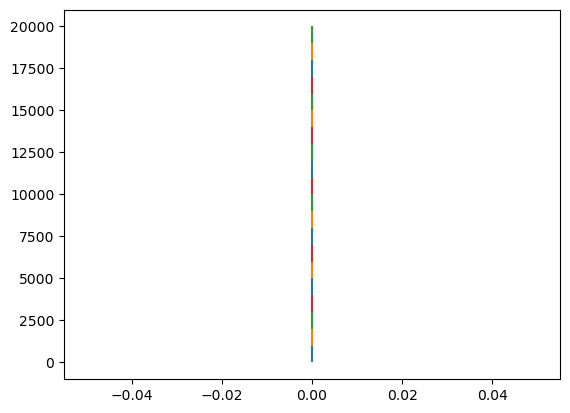

In [34]:
from streamselect.evaluation.context_inference import plot_ground_truth_contexts

plot_ground_truth_contexts(datastream_segments)

Finally, FALL defines a `ConceptSegmentDataStream` class which handles drawing a new observation from the stream based on the set of stream concepts.

The `ConceptSegmentDataStream` class defines the same interface as the base data generators, so a system can consider the stream as a single source of data.

The final parameter for constructing a concept segment data stream is to define the width of concept drift between segments. Concept drift can be _abrupt_ when concept drift occurs instantly, or _gradual_ where concept drift occurs over a number of observations.

The `ConceptSegmentDataStream` class takes a drift width parameter, where a drift width can be specified for each drift as a list, or for all drifts as an int. If a drift width is 0 then drift will be abrupt, while if the drift width is > 0 then the drift will be gradual.

Under the hood, gradual drift is specified using a sigmoid to define the probability of selecting an observation from the new concept. After `drift_width` observations, the probability is 1.

In [31]:
from streamselect.data.datastream import ConceptSegmentDataStream

s0 = WindSimGenerator(concept=0)
s1 = WindSimGenerator(concept=1)
s2 = WindSimGenerator(concept=2)
s3 = WindSimGenerator(concept=3)
c0 = Concept(s0, "0")
c1 = Concept(s1, "1")
c2 = Concept(s2, "2")
c3 = Concept(s3, "3")

n_repeats = 30
pattern = circular_transition_pattern(4, n_repeats, 1.0, 1, 0.0, shuffle_order=False)

segment_length = 1000
concept_segments = make_stream_concepts([c0, c1, c2, c3], pattern, segment_length)

seed = 42
drift_width = 0
datastream = ConceptSegmentDataStream(concept_segments, drift_width, seed)

In [32]:
for (X, y) in datastream.take(5):
    print(X, y)

{'x_num_0': 2295.0, 'x_num_1': 2295.0, 'x_num_2': 2295.0, 'x_num_3': 2295.0, 'x_num_4': 2295.0, 'x_num_5': 2295.0, 'x_num_6': 2295.0, 'x_num_7': 2295.0, 'x_num_8': 2295.0, 'x_num_9': 2295.0, 'x_num_10': 2295.0, 'x_num_11': 4500.091593162087, 'x_num_12': 2295.0, 'x_num_13': 2365.313694050874, 'x_num_14': 4496.629032383278, 'x_num_15': 2436.7797914001294} 20
{'x_num_0': 2295.0, 'x_num_1': 2295.0, 'x_num_2': 2295.0, 'x_num_3': 2295.0, 'x_num_4': 2295.0, 'x_num_5': 2295.0, 'x_num_6': 2295.0, 'x_num_7': 2295.0, 'x_num_8': 2295.0, 'x_num_9': 2295.0, 'x_num_10': 2295.0, 'x_num_11': 4500.091593162087, 'x_num_12': 2295.0, 'x_num_13': 2365.313694050874, 'x_num_14': 4496.629032383278, 'x_num_15': 2436.7797914001294} 20
{'x_num_0': 4938.908391115453, 'x_num_1': 5335.9166567424645, 'x_num_2': 6547.817224493841, 'x_num_3': 6772.336597285107, 'x_num_4': 5530.180793718911, 'x_num_5': 4502.64551365188, 'x_num_6': 8911.537778743748, 'x_num_7': 4349.374812206379, 'x_num_8': 651.8498600366854, 'x_num_9': 